# 分类数据的可视化分析
* 观测点的直接展示：swarmplot, stripplot
* 观测近似分布的展示：boxplot, violinplot
* 均值和置信区间的展示：barplot, pointplot

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid", color_codes=True)
import warnings
warnings.filterwarnings("ignore")
np.random.seed(2017)
titanic = sns.load_dataset("titanic")
tips = sns.load_dataset("tips")
iris = sns.load_dataset("iris")

In [2]:
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,NaN,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,NaN,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,NaN,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,NaN,Cherbourg,yes,False


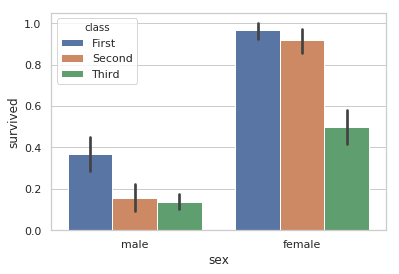

In [9]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic,ci=95)  # 黑线表示置信区间

## 分类散点图
当有一维数据是分类数据时，散点图成为了条带形状。

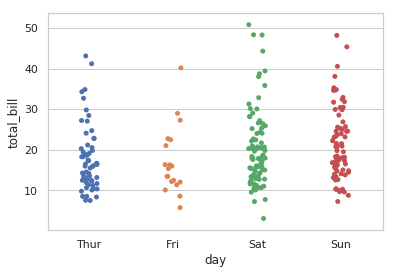

In [4]:
sns.stripplot(x="day", y="total_bill", data=tips)  # ----> 很少用

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


散点都在一起看不清楚？还记得抖动的方法咩~

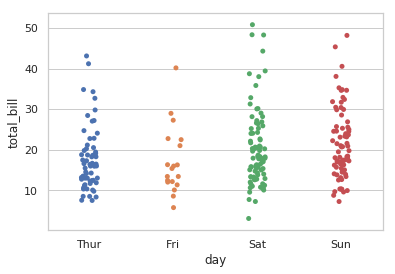

In [6]:
sns.stripplot(x="day", y="total_bill", data=tips, jitter=True)

另外一种处理办法，是生成蜂群图，避免散点重叠~

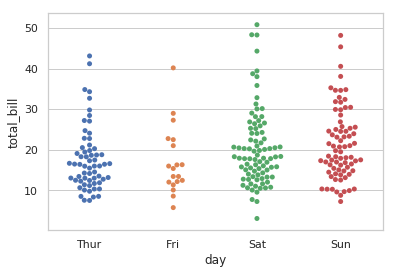

In [7]:
sns.swarmplot(x="day", y="total_bill", data=tips)

在每一个一级分类内部可能存在二级分类

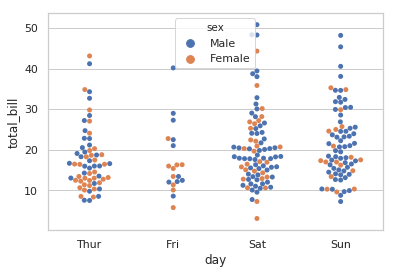

In [8]:
sns.swarmplot(x="day", y="total_bill", hue="sex", data=tips)

## 分类分布图
### 箱图
上边缘、上四分位数、中位数、下四分位数、下边缘

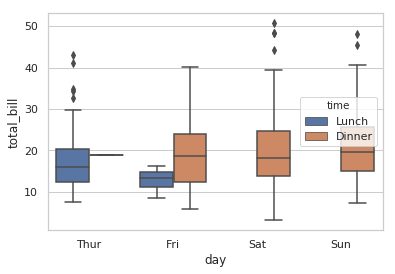

In [9]:
 +++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++


sns.boxplot(x="day", y="total_bill", hue="time", data=tips)

### 提琴图
箱图 + KDE(Kernel Distribution Estimation)

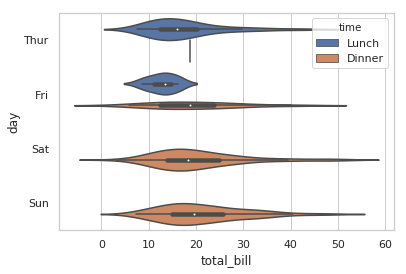

In [10]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips)  # 白点-->中位数，黑线表示25%和75%，曲线表示概率密度

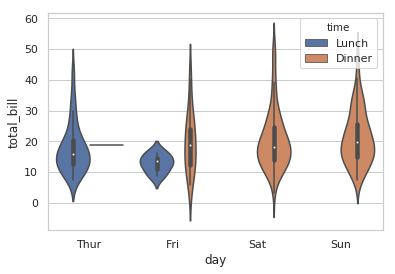

In [11]:
sns.violinplot(x="day", y="total_bill", hue="time", data=tips)

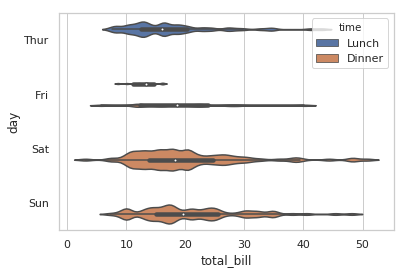

In [12]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)


In [13]:
# why not is a single violin?

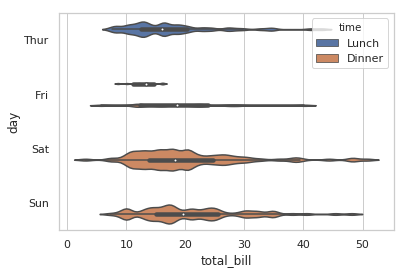

In [14]:
sns.violinplot(x="total_bill", y="day", hue="time", data=tips, bw=.1, scale="count", scale_hue=False)

非对称提琴图

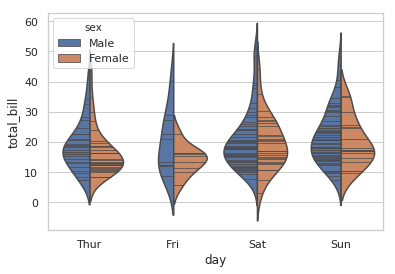

In [15]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips, split=True, inner="stick")  # split=True -->将两个分布合并在一起

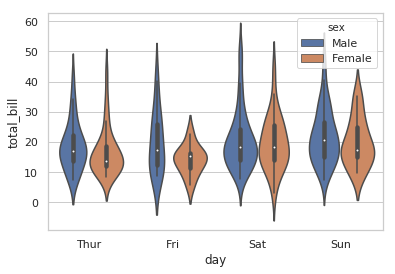

In [16]:
sns.violinplot(x="day", y="total_bill", hue="sex", data=tips)

## 分类统计估计图
### 统计柱状图

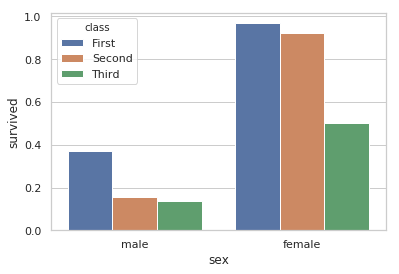

In [17]:
sns.barplot(x="sex", y="survived", hue="class", data=titanic,ci=None)

### 灰度柱状图

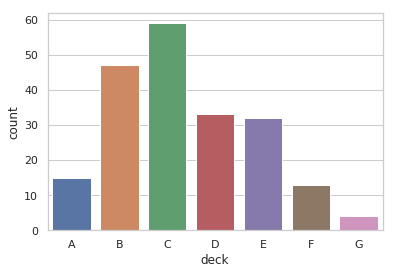

In [18]:
sns.countplot(x="deck", data=titanic)
# value_counts()  对离散变量做统计

### 点图

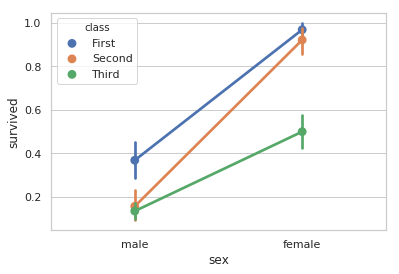

In [19]:
sns.pointplot(x="sex", y="survived", hue="class", data=titanic)

修改颜色、标记、线型

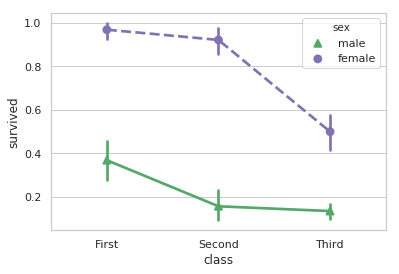

In [20]:
sns.pointplot(x="class", y="survived", hue="sex", data=titanic,
              palette={"male": "g", "female": "m"},
              markers=["^", "o"], linestyles=["-", "--"])

## 分类子图

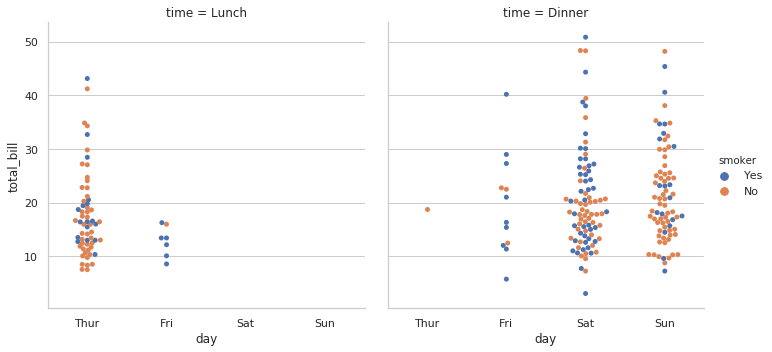

In [21]:
sns.factorplot(x="day", y="total_bill", hue="smoker", col="time", data=tips, kind="swarm")

多分类标准的子图

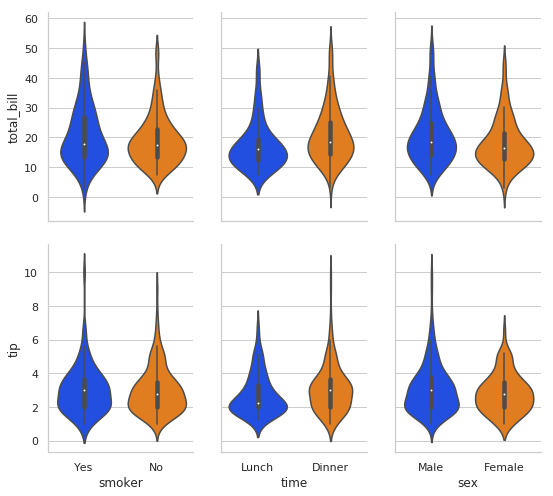

In [22]:
g = sns.PairGrid(tips,
                 x_vars=["smoker", "time", "sex"],
                 y_vars=["total_bill", "tip"],
                 aspect=.75, size=3.5)
g.map(sns.violinplot, palette="bright");

# n*n方阵
#map_diag
#map_offdiag